In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data0 = pd.read_csv('urlda.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,depositphotos.com,0,0,1,1,0,0,0,0,1.0
1,extratorrent.cc,0,0,1,3,0,0,0,0,1.0
2,mic.com,0,0,1,3,0,0,0,0,1.0
3,digg.com,0,0,1,2,0,0,0,0,1.0
4,ifttt.com,0,0,1,2,0,0,1,0,1.0


In [ ]:
data0.shape

(100, 10)

In [ ]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [ ]:
data0=data0[['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix','Label']]

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Domain         100 non-null    object 
 1   Have_IP        100 non-null    int64  
 2   Have_At        100 non-null    int64  
 3   URL_Length     100 non-null    int64  
 4   URL_Depth      100 non-null    int64  
 5   Redirection    100 non-null    int64  
 6   https_Domain   100 non-null    int64  
 7   TinyURL        100 non-null    int64  
 8   Prefix/Suffix  100 non-null    int64  
 9   Label          100 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 7.9+ KB


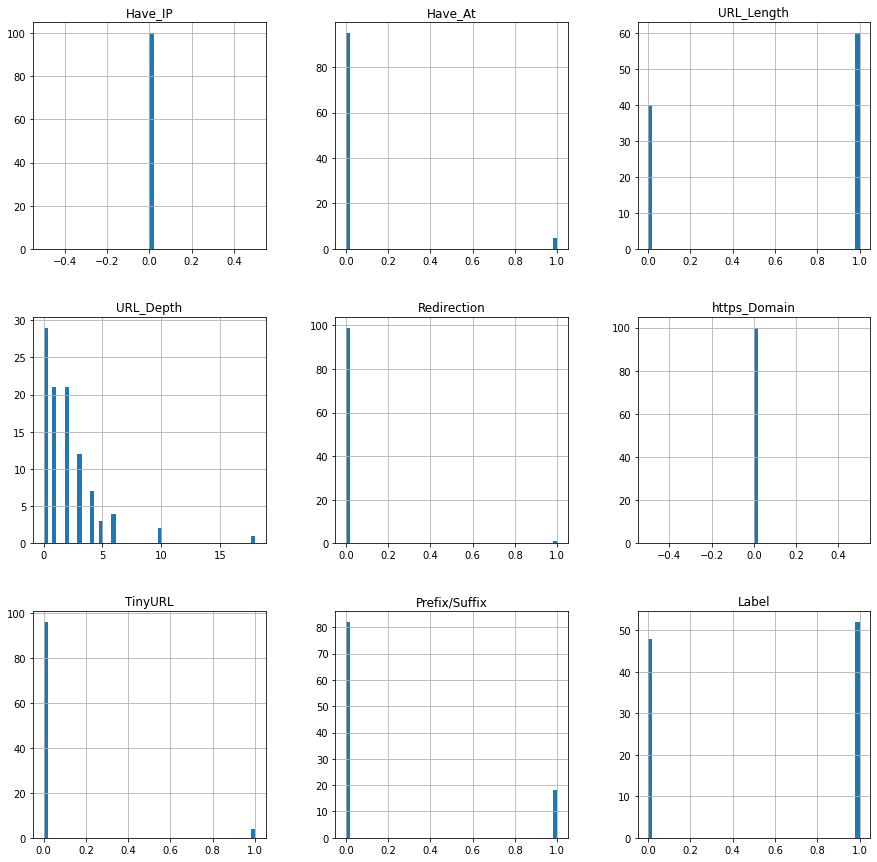

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

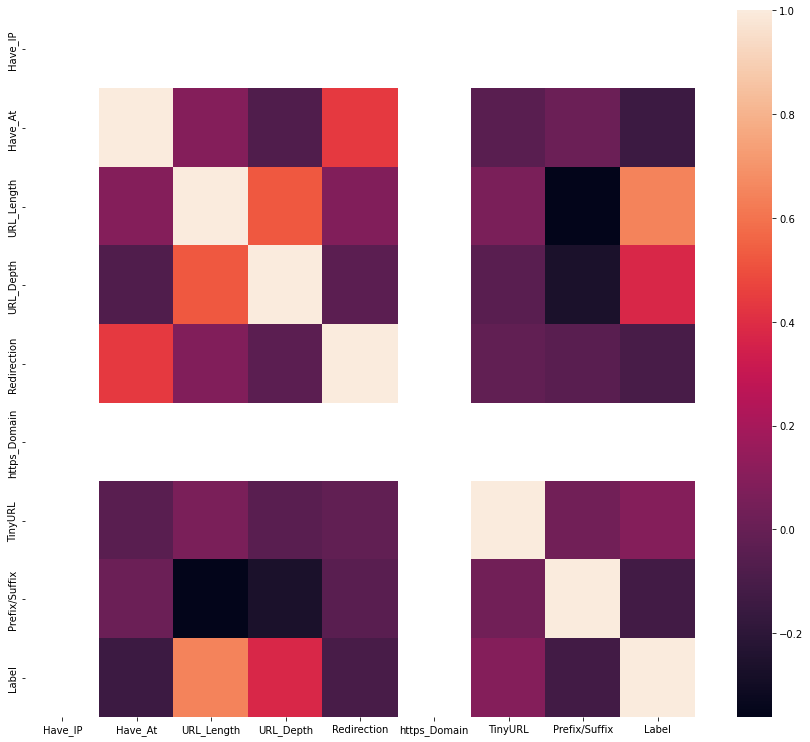

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
count,100.0,100.000000,100.000000,100.000000,100.00,100.0,100.000000,100.000000,100.000000
mean,0.0,0.050000,0.600000,2.040000,0.01,0.0,0.040000,0.180000,0.520000
std,0.0,0.219043,0.492366,2.565978,0.10,0.0,0.196946,0.386123,0.502117
min,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,1.500000,0.00,0.0,0.000000,0.000000,1.000000
75%,0.0,0.000000,1.000000,3.000000,0.00,0.0,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,18.000000,1.00,0.0,1.000000,1.000000,1.000000


In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:


#checking the data for null or missing values
data.isnull().sum()



Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,1,0,0,0,0,0.0
1,0,0,1,3,0,0,0,0,0.0
2,0,0,1,3,0,0,0,0,1.0
3,0,0,1,2,0,0,0,0,1.0
4,0,0,0,0,0,0,0,1,0.0


In [ ]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((100, 8), (100,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((80, 8), (20, 8))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 2)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.838
Decision Tree: Accuracy on test Data: 0.850


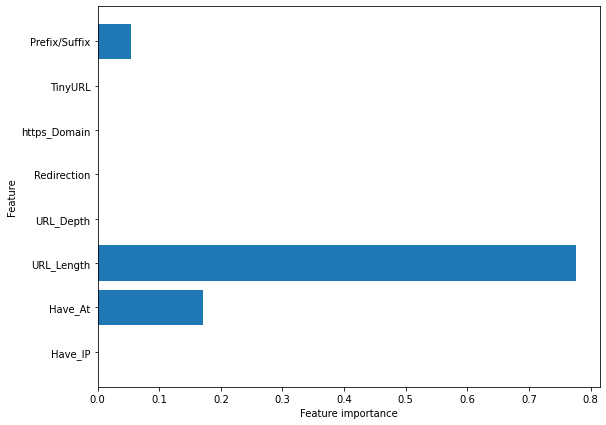

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()